## 数组总结

### LC.704 [二分查找](https://leetcode.cn/problems/binary-search/)
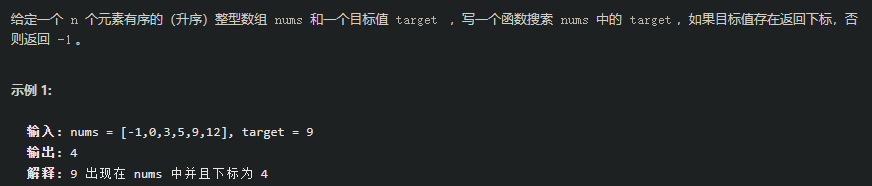

In [2]:
# 没啥好说的，注意s<=e的中止条件
def lc704(nums):
    nums.sort()
    s,e = 0,len(nums) - 1
    while s <= e:  # 考虑[1]的情况，如果只是<而不是<=的话，这种情况直接就凉了
        mid = (s+e) // 2
        if nums[mid] < target:
            s = mid + 1           # 每次必须向前进一
        if nums[mid] > target:
            e = mid - 1
        if nums[mid] == target:
            return mid
    return -1

### LC.27 [移除元素](https://leetcode.cn/problems/remove-element/)
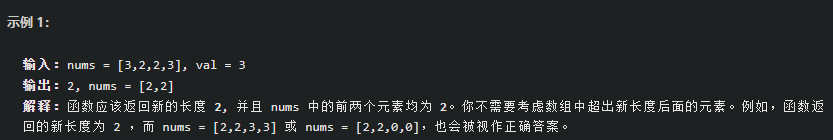

In [3]:
# 快慢指针，快指针跳过要重复的元素，最后只返回慢指针长度的数组
def lc27(nums):
    s,e = 0,0
    length = len(nums)
    while e < length:
        while e < length and nums[e] == val:
            e += 1
        if e < length:
            nums[s] = nums[e]
        else:
            return s  # 这里需要注意：由于最后一个s一直没有赋值，所以补您而过返回s+1
        e += 1
        s += 1
    return len(nums[:s])

### LC.977 [有序数组的平方和](https://leetcode.cn/problems/squares-of-a-sorted-array/)
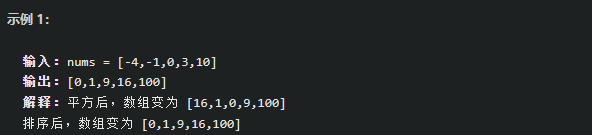

In [4]:
# 双指针，从后往前插入数据
def lc977(nums):
    # 双指针
    s,e = 0,len(nums)-1
    k = len(nums) - 1

    while s<=e:
        print(nums)
        # 从后到前添加最大的值
        if abs(nums[s]) >= abs(nums[e]):
            tmp = nums[s]
            nums[s] = nums[e]
            nums[k] = tmp**2
            e -= 1
        else:
            nums[k] = nums[k]**2
            e -= 1
        k -= 1
    return nums

### LC.209 [长度最小的子数组](https://leetcode.cn/problems/minimum-size-subarray-sum/)
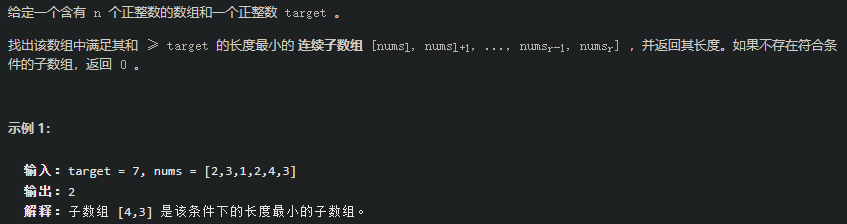

In [6]:
# 滑动窗口
def lc209(nums,target):
    # 滑动窗口
    s,e = 0,0
    tmp,l = 0,0
    res = float('INF')
    while e < len(nums):
        tmp += nums[e]
        l += 1

        while tmp >= target:
            if res > l:
                res = l
            tmp -= nums[s]
            s += 1
            l -= 1
        e += 1
    return res if res != float('INF') else 0

lc209([2,3,1,2,4,3],7)

2

### LC.59 [螺旋矩阵](https://leetcode.cn/problems/spiral-matrix-ii/)
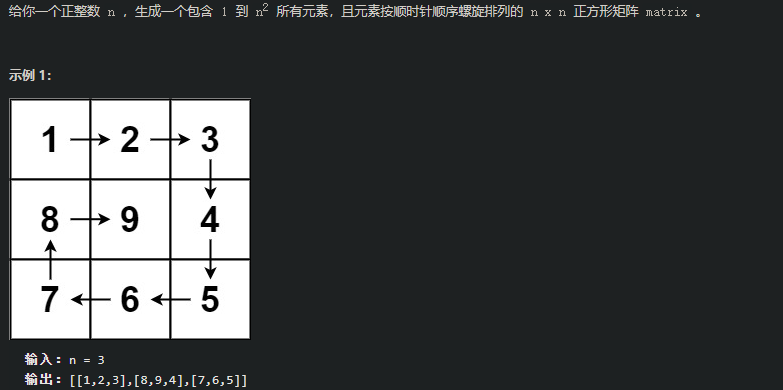

In [9]:
# 模拟，只要控制好每次插入的min_row,max_row,min_col,max_col就好
def lc59(n):
    res = [[-1 for i in range(n)] for j in range(n)]
    min_row,max_row = 0, n-1
    min_col,max_col = 0, n-1
    i = 1
    while i <= n**2:
        if min_row <= max_row and min_col <= max_col:
            for j in range(min_col,max_col+1):
                res[min_row][j] = i
                i += 1
            min_row += 1

        if min_row <= max_row and min_col <= max_col:
            for j in range(min_row,max_row+1):
                res[j][max_col] = i
                i += 1
            max_col -= 1

        if min_row <= max_row and min_col <= max_col:
            for j in range(max_col,min_col-1,-1):
                res[max_row][j] = i
                i += 1
            max_row -= 1

        if min_row <= max_row and min_col <= max_col:
            for j in range(max_row,min_row-1,-1):
                res[j][min_col] = i
                i += 1
            min_col += 1
        # print(min_row,max_row,min_col,max_col)

    return res

lc59(5)

[[1, 2, 3, 4, 5],
 [16, 17, 18, 19, 6],
 [15, 24, 25, 20, 7],
 [14, 23, 22, 21, 8],
 [13, 12, 11, 10, 9]]

### LC.283 [移动0](https://leetcode.cn/problems/move-zeroes/description/)
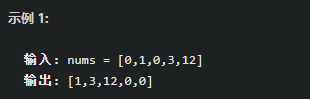

In [10]:
def lc283(nums):
    # 双指针
    s,e = 0,0
    while e < len(nums):
        while e<len(nums) and nums[e] == 0:
            e += 1
        if e < len(nums):
            nums[s] = nums[e]
            s += 1
        e += 1
    while s < len(nums):
        nums[s] = 0
        s += 1
    return nums

lc283([0,1,0,3,12])

[1, 3, 12, 0, 0]

### LC.566 [重塑矩阵](https://leetcode.cn/problems/reshape-the-matrix/description/)
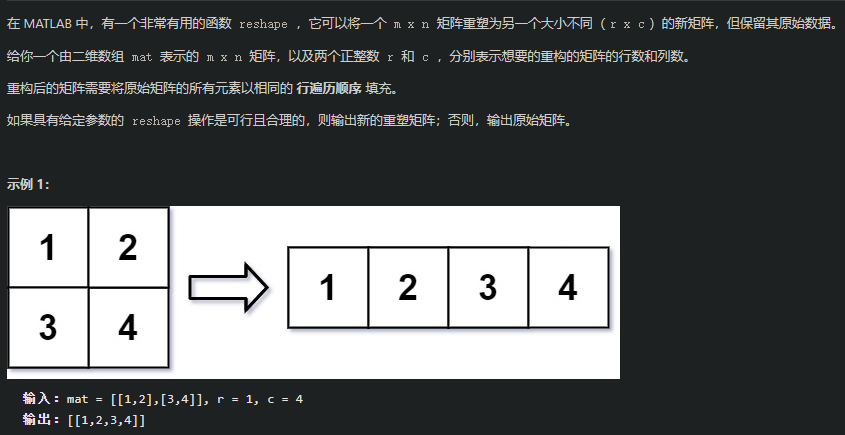

In [11]:
# 逐个添加就行了
def lc566(mat,r,c):
    res = [[-1 for i in range(c)] for j in range(r)]
    tmp = []

    if len(mat)*len(mat[0]) != r*c:return mat  # 判断能否转换

    index = 0
    for i in range(r):
        for j in range(c):
            res[i][j] = mat[index//len(mat[0])][index%len(mat[0])]
            index += 1
    return res

lc566([[1,2],[3,4]],1,4)

[[1, 2, 3, 4]]

### LC.485 [最大连续1的个数](https://leetcode.cn/problems/max-consecutive-ones/description/)
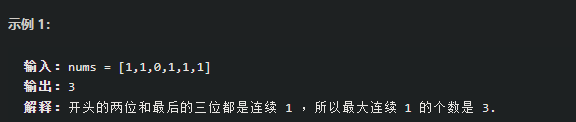

In [12]:
# 滑动窗口
def lc485(nums):
    s,e = 0,0
    maxl = 0
    while e < len(nums):
        # 找有多少个连续的1
        while e < len(nums) and nums[e] == 1:
            e += 1
        # 判断是不是最长的
        if e-s >= maxl:
            maxl = e-s
        # 找下一段
        while e < len(nums) and nums[e] != 1:
            e += 1
        s = e
    return maxl

lc485([1,1,0,1,1,1])

3

### LC.240 [搜索二维矩阵 II](https://leetcode.cn/problems/search-a-2d-matrix-ii/description/)
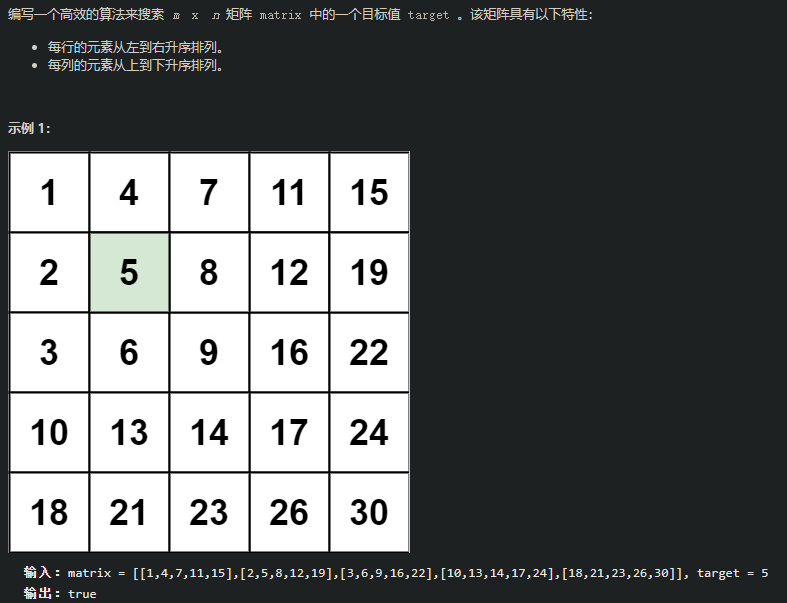

In [13]:
# 右上角和左下角
def lc240(matrix,target):
    # 从右上角开始搜索:比它小的都在左边，比它大的都在下面
    row,col = 0,len(matrix[0])-1
    while row < len(matrix) and col >= 0:
        if matrix[row][col] == target:return True
        if matrix[row][col] > target:
            col -= 1
        if matrix[row][col] < target:
            row += 1
    return False

lc240([[1,4,7,11,15],[2,5,8,12,19],[3,6,9,16,22],[10,13,14,17,24],[18,21,23,26,30]],5)

True

### LC.378 [有序矩阵中第 K 小的元素](https://leetcode.cn/problems/kth-smallest-element-in-a-sorted-matrix/description/)
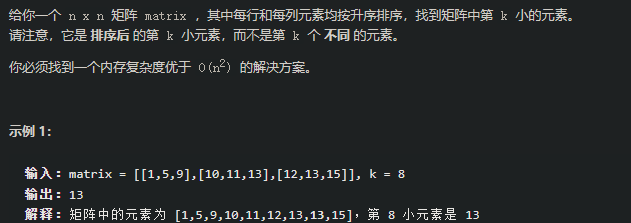

In [15]:
# 二分法
def lc378(matrix,k):
    def count_mid(mid):
        row,col = len(matrix)-1, 0
        num = 0 # 有多少个数小于等于mid
        res = -float('INF') # 小于等于mid的最大值是多少

        while row>=0 and col < len(matrix):
            if matrix[row][col] <= mid:
                if matrix[row][col] > res:
                    res = matrix[row][col]
                num += row+1
                col += 1
            else:
                row -= 1
        return num,res  # 有num个小于k的数字，最大值是res

    # 二分法
    n = len(matrix)
    left,right = matrix[0][0],matrix[n-1][n-1]
    while left <= right:

        mid = (left+right) // 2
        num,res = count_mid(mid)
        # print(left,right,num,res)
        if num > k:
            right = mid - 1
        if num < k:
            left = mid + 1
        if num == k:
            return res

    return left # 如果有多个返回值

lc378([[1,5,9],[10,11,13],[12,13,15]],8)

13

### LC.645 [错误的组合](https://leetcode.cn/problems/set-mismatch/description/)
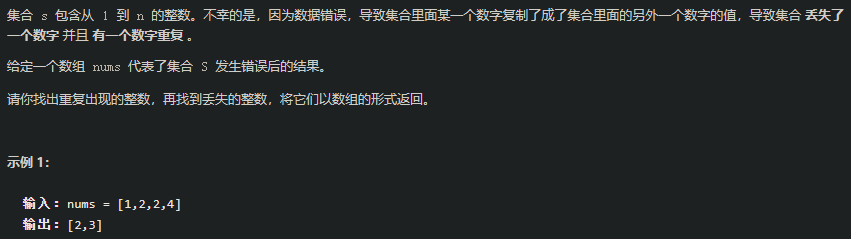

In [17]:
def lc645(nums):
    dic = {}
    res = []
    for i in range(1,len(nums)+1):
        dic[i] = dic.get(i,0) + 1
    for n in nums:
        dic[n] -= 1
        if dic[n] == -1:
            res.append(n)
    for d in dic:
        if dic[d] == 1:
            res.append(d)
    return res

lc645([1,2,2,4])

[2, 3]

### LC.287 [寻找重复数](https://leetcode.cn/problems/find-the-duplicate-number/description/)
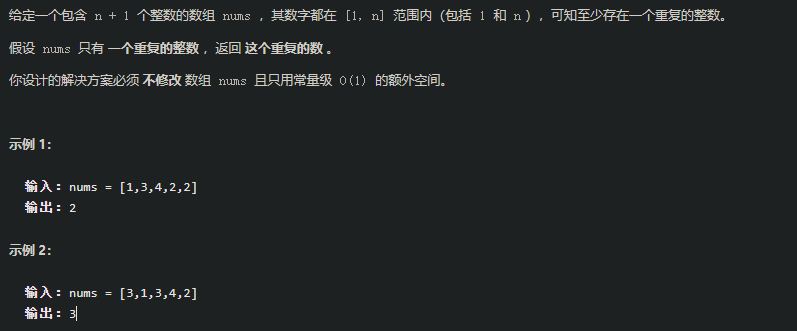

In [18]:
# 时间复杂度是O(nlogn)比较简单，只要排序遍历一下就行
def lc287(nums):
    nums.sort()
    s,e = 0,1
    while e < len(nums):
        if nums[s] == nums[e]:
            return nums[s]
        else:
            s += 1
            e += 1
        
# 时间复杂度是O(n)很难，将数组看成一个链表，相当于必环，那么找到环的入口就好了：没想到
def lc287_1(nums):
    # 由于只有两个相同的数字，所以必然会有环，太绝了
    slow=0
    fast=0

    # 找到slow和fast的交点
    while True:
        slow=nums[slow]
        fast=nums[nums[fast]]
        if(slow==fast):
            break

    # 找到环的入口
    find=0
    while(1):
        find=nums[find]
        slow=nums[slow]
        if(find==slow):
            return find
lc287([1,3,4,2,2]),lc287_1([1,3,4,2,2])

(2, 2)

### LC.667 [优美的排列 II](https://leetcode.cn/problems/beautiful-arrangement-ii/description/)
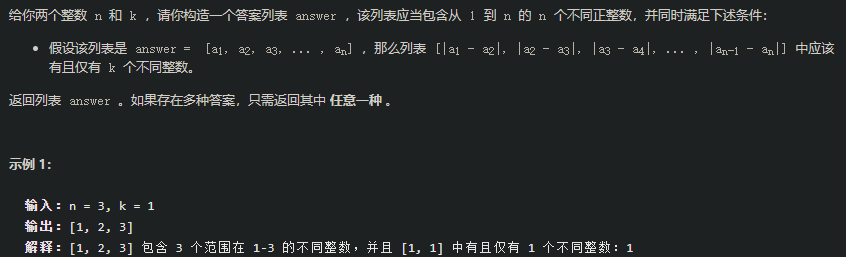

In [19]:
# 找规律，emmm，抄作业了，模拟构造
def lc667(n,k):
    ans = [1]
    i = c = 1
    rem = k
    while rem >= 1:
        i += rem * c
        ans.append(i)
        c *= -1
        rem -= 1
    for j in range(k + 2, n + 1):
        ans.append(j)
    return ans

# 作者：si-gu-wo-huan-zai
# 链接：https://leetcode.cn/problems/beautiful-arrangement-ii/solution/by-si-gu-wo-huan-zai-fbgj/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。
lc667(10,7)

[1, 8, 2, 7, 3, 6, 4, 5, 9, 10]

### LC.697 [数组的度](https://leetcode.cn/problems/degree-of-an-array/description/)
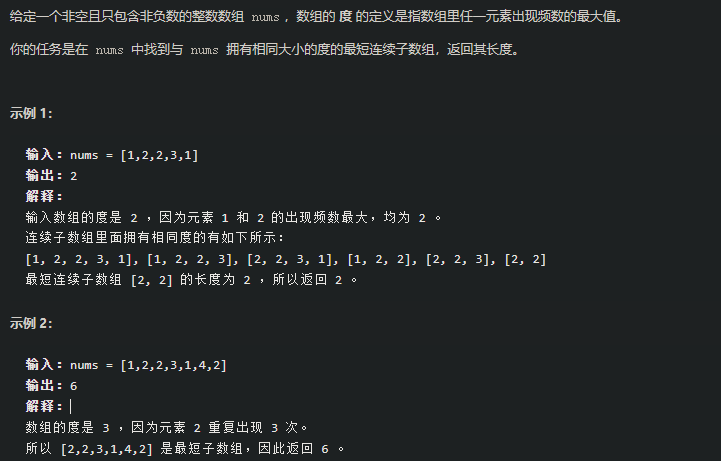

In [20]:
# 找到最大的度，并找到最长的res
def lc697(nums):
    dic = {}
    num = []
    max_num = 0
    # 找能表示度的值
    for n in nums:
        dic[n] = dic.get(n,0) + 1
        if max_num <= dic[n]:
            if max_num < dic[n]:
                num = [n]
            else:
                if n not in num:
                    num.append(n)
            max_num = dic[n]

    # 找最小的度
    res = []
    for n in num:
        s,e = 0,len(nums)-1
        while nums[s] != n:
            s += 1
        while nums[e] != n:
            e -= 1
        res.append(e-s+1)

    return min(res)

lc697([1,2,2,3,1,4,2])

6

### LC.766 [托普利茨矩阵](https://leetcode.cn/problems/toeplitz-matrix/)
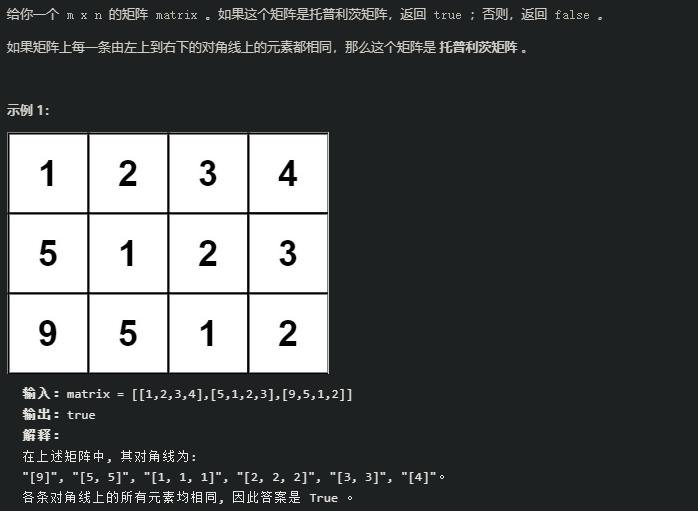

In [21]:
# 简单模拟
def lc766(matrix):
    m,n = len(matrix)-1,len(matrix[0])-1
    # 比较列
    for row in range(m,0,-1):
        num = matrix[row][0]
        r = row
        c = 0
        while 0<=r<=m and 0<=c<=n:
            if matrix[r][c] != num:
                return False
            if not 0<=r+1<=m or not 0<=c+1<=n:
                break
            r += 1
            c += 1

    # 比较行
    for col in range(n+1):
        num = matrix[0][col]
        r = 0
        c = col
        while 0<=r<=m and 0<=c<=n:
            if matrix[r][c] != num:
                return False
            if not 0<=r+1<=m or not 0<=c+1<=n:
                break
            r += 1
            c += 1

    return True

lc766([[1,2,3,4],[5,1,2,3],[9,5,1,2]])

True

### LC.565 [嵌套数组](https://leetcode.cn/problems/array-nesting/)
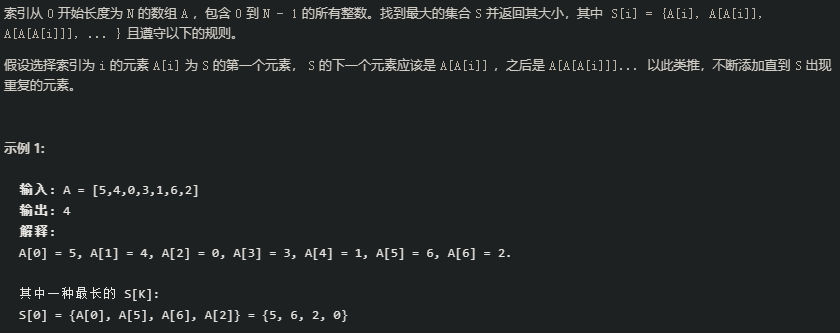

In [22]:
# 包含多个环，每次找到一个环就把这个环中所有值置-1
def lc565(nums):
    # 这是具有很多个环，一个环只要遍历一次就够了，在碰到这个环里的直接跳过，所以时间复杂度是O(n)
    res = 0
    for n in nums:
        tmp = n
        cur = 0
        while nums[tmp] != -1:
            cur += 1
            if cur > res:
                res = cur
            nums[tmp],tmp = -1, nums[tmp] #注意前后顺序不能反
    return res

lc565([5,4,0,3,1,6,2])

4

### LC.769 [最多能完成排序的块](https://leetcode.cn/problems/max-chunks-to-make-sorted/)
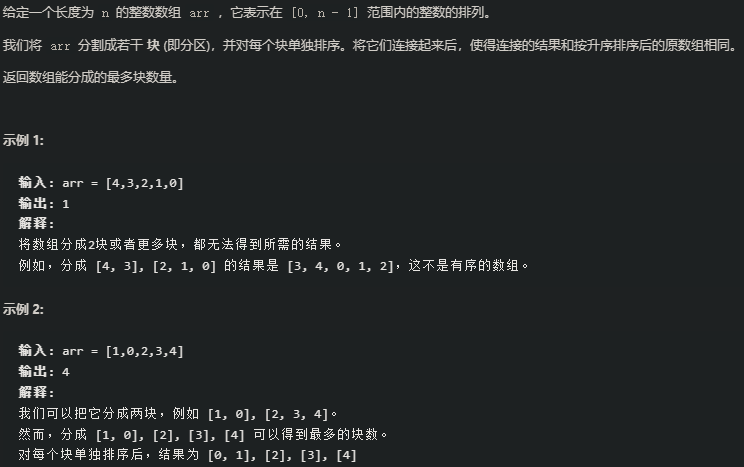

In [24]:
# 贪心，遍历，只要当时的最大值等于idx，就分割一次
def lc769(arr):
    # 贪心，遍历到的最大数值和下标相等就可以切割一份
    max_num = 0
    res = 0
    for idx, a in enumerate(arr):
        if max_num < a:
            max_num = a
        if max_num == idx:
            res += 1
    return res

lc769([4,3,2,1,0])

# 进阶：单调栈，之后补上

1